In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install nltk
!pip install wordcloud

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file
file_path = 'yelp_rating.csv'

# Read the CSV file into a pandas DataFrame
rev = pd.read_csv(file_path)

rev.head()


,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,28-05-2016,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,28-05-2016,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,28-05-2016,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,28-05-2016,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,28-05-2016,Had their chocolate almond croissant and it wa...,0,0,0


In [4]:
# Display the shape of the DataFrame 'rev', which shows the number of rows and columns.
rev.shape

# Print information about the DataFrame 'rev', including data types, non-null counts, and memory usage.
print(rev.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    90000 non-null  object
 1   user_id      90000 non-null  object
 2   business_id  90000 non-null  object
 3   stars        90000 non-null  int64 
 4   date         90000 non-null  object
 5   text         90000 non-null  object
 6   useful       90000 non-null  int64 
 7   funny        90000 non-null  int64 
 8   cool         90000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 6.2+ MB
None


In [5]:
# Create a new DataFrame 'reviews' by dropping specific columns ('date', 'business_id', 'review_id', 'user_id') from the original DataFrame 'rev'.
reviews = rev.drop(['date', 'business_id', 'review_id', 'user_id'], axis=1)


In [6]:
# Create a new column 'text length' in the DataFrame 'reviews', which represents the length (number of characters) of the 'text' column in the original DataFrame 'rev'.
reviews['text length'] = rev['text'].apply(len)


In [7]:
reviews.head()

,stars,text,useful,funny,cool,text length
0,5,Super simple place but amazing nonetheless. It...,0,0,0,213
1,5,Small unassuming place that changes their menu...,0,0,0,502
2,5,Lester's is located in a beautiful neighborhoo...,0,0,0,373
3,4,Love coming here. Yes the place always needs t...,0,0,0,523
4,4,Had their chocolate almond croissant and it wa...,0,0,0,231


In [8]:
# Check if there are any missing (null) values in the 'reviews' DataFrame.
# The expression 'reviews.isnull()' returns a DataFrame of the same shape as 'reviews' with True at the positions where values are null and False where they are not.
# 'any().any()' checks if there is at least one True value in the resulting boolean DataFrame, indicating the presence of at least one missing value in 'reviews'.
reviews.isnull().any().any()


False

Text(0, 0.5, 'Count')

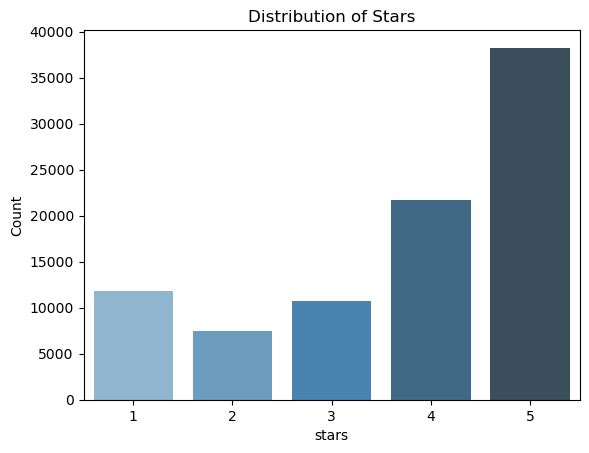

In [9]:
# Create a count plot using Seaborn to visualize the distribution of 'stars' in the 'reviews' DataFrame.
# The 'x' parameter specifies the column for which the counts are to be plotted ('stars' in this case).
# The 'data' parameter specifies the DataFrame to use ( 'reviews').
# The 'palette' parameter sets the color palette for the plot (using the 'Blues_d' palette).
cplot = sns.countplot(x='stars', data=reviews, palette="Blues_d")

# Set the title of the count plot.
cplot.set_title('Distribution of Stars')

# Set the y-axis label of the count plot.
cplot.set_ylabel('Count')


Text(0.5, 1.0, 'Text Length Distribution')

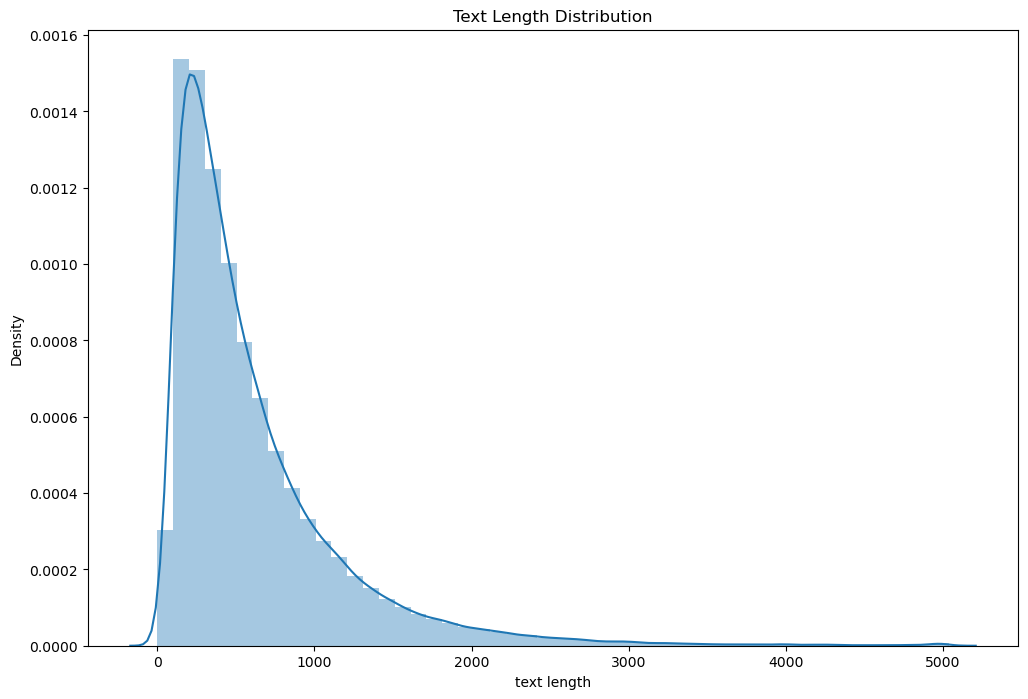

In [10]:
# Create a new Matplotlib figure with a specified size (12 inches by 8 inches).
fig = plt.figure(figsize=(12, 8))

# Use Seaborn to plot a distribution of the 'text length' column from the 'reviews' DataFrame.
# The 'kde=True' parameter adds a Kernel Density Estimate plot on top of the histogram.
# The 'bins=50' parameter specifies the number of bins in the histogram.
sns.distplot(reviews['text length'], kde=True, bins=50)

# Set the title of the plot to 'Text Length Distribution'.
plt.title('Text Length Distribution')


In [11]:
text = reviews[['stars','text']]
text.head()

,stars,text
0,5,Super simple place but amazing nonetheless. It...
1,5,Small unassuming place that changes their menu...
2,5,Lester's is located in a beautiful neighborhoo...
3,4,Love coming here. Yes the place always needs t...
4,4,Had their chocolate almond croissant and it wa...


In [12]:
# Define a list of common English stopwords using NLTK's stopwords.words("english").
cachedStopWords = stopwords.words("english")

# Define a function 'remove_punc_stopword' to preprocess text by removing punctuation and stopwords.
# The function takes a 'text' parameter as input.

def remove_punc_stopword(text):
    # Remove punctuation from the text and convert it to lowercase.
    remove_punc = [word for word in text.lower() if word not in string.punctuation]
    
    # Join the characters to form a string without punctuation.
    remove_punc = ''.join(remove_punc)
    
    # Tokenize the string, removing stopwords using the predefined list of stopwords.
    return [word for word in remove_punc.split() if word not in cachedStopWords]


In [13]:
cleaned_text = text.copy()
cleaned_text['text'] = text['text'].apply(remove_punc_stopword)

In [14]:
cleaned_text.head()

,stars,text
0,5,"[super, simple, place, amazing, nonetheless, a..."
1,5,"[small, unassuming, place, changes, menu, ever..."
2,5,"[lesters, located, beautiful, neighborhood, si..."
3,4,"[love, coming, yes, place, always, needs, floo..."
4,4,"[chocolate, almond, croissant, amazing, light,..."


In [15]:
# Define a function 'plot_Freq' for visualizing the frequency distribution of words in a text dataset.
# The function takes a DataFrame 'data' as input.

def plot_Freq(data):
    # Reset the index of the 'text' column in the DataFrame and concatenate all texts into a single list.
    texts = np.concatenate(data.text.reset_index(drop=True))
    
    # Use NLTK's FreqDist to compute the frequency distribution of words and plot the top 20 most common words.
    # The 'cumulative=False' parameter indicates that the plot shows individual frequencies, not cumulative.
    FreqDist(texts).plot(20, cumulative=False)


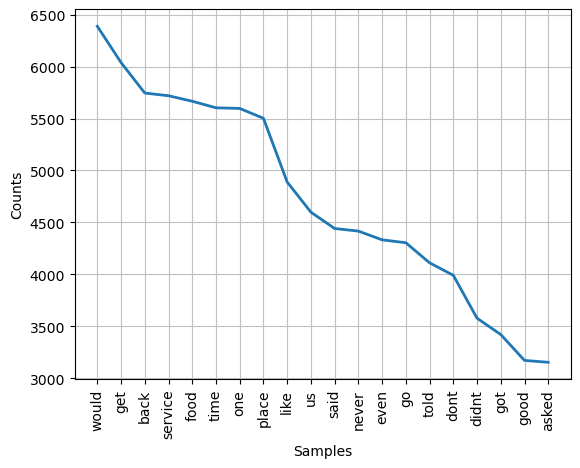

In [16]:
plot_Freq(cleaned_text[cleaned_text['stars']==1])

In [17]:
# Import necessary libraries for creating a WordCloud visualization.
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Define a function 'reviewCloud' to generate and display a WordCloud based on reviews with a specific star rating.
# The function takes a 'star' parameter indicating the star rating.

def reviewCloud(star):
    # Concatenate all text reviews corresponding to the given star rating.
    startext = ' '.join(text[text['stars'] == star]['text'])

    # Create a WordCloud object with specified parameters.
    wordcloud = WordCloud(
        width=3000,
        height=2000,
        background_color='black',
        stopwords=STOPWORDS
    ).generate(str(startext), orientation='NA')

    # Get the font size used in the WordCloud.
    font = wordcloud.get_fontsize()

    # Rest of the code for displaying or saving the WordCloud can be added here.
  
    # Example usage: Generate and display a WordCloud for reviews with a star rating of 1.
    reviewCloud(1)


In [18]:
rev.tail()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
89995,qBcgzcv6ARS04Nxh77K_Bw,XhrlkiNB867EmtYuDTcq7Q,FTo64sohiSRBRM9e9NzeAQ,4,22-08-2017,Stopped in for margaritas and was surprised to...,1,0,0
89996,LtPhRHQsTljApk0LS_4awQ,XhrlkiNB867EmtYuDTcq7Q,vxByu2zWCbv1qMRf3kOW6g,5,15-08-2017,Delicious and unique mead\/flavors!\nTried the...,0,0,1
89997,up738VLjzsnd97teSqbc3g,XhrlkiNB867EmtYuDTcq7Q,qlYEn2ANcY-x-2IwgOD91g,4,22-08-2017,"What a super cool grocery! Bright clean space,...",0,0,0
89998,hV7L7Lo4GGuKtGwTCx2tdg,XhrlkiNB867EmtYuDTcq7Q,C37hwsGUHn_3-il0ypeY-Q,5,16-08-2017,"Dark bar with TCM playing, umm hell yes!! \n\n...",1,0,0
89999,IU0DFDTvcsqQodz3bnnV4g,XhrlkiNB867EmtYuDTcq7Q,l6nLQvrzzMO4zJC7jJjQGg,5,18-09-2013,I've found super cool stuff here at really rea...,6,2,2


In [19]:
rev.loc[86353,:]

review_id                                 dNwJP7Kc-GLy6SAWVLVI7Q
user_id                                   ayHvt_WaKGO44oe6BbgSsA
business_id                               Wc9UpJhOcdSj7olZkz7SJA
stars                                                          5
date                                                  28-01-2016
text           Wow! Exemplary experience!!\nI've been meaning...
useful                                                         2
funny                                                          0
cool                                                           0
Name: 86353, dtype: object

In [20]:
restaurant = rev[rev.business_id==rev.loc[86353,:].business_id]

In [21]:
restaurant.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
1944,hOQYuoBHKG4bEXJd-FzEZg,Jt4u7qnfrk35buainfOuGA,Wc9UpJhOcdSj7olZkz7SJA,4,16-12-2013,This review only speaks to the amazing milksha...,0,0,1
3633,uHeyFnH3CH73-WRpJLFZkA,mvq6mTZBd3mdDg_bZRWiuQ,Wc9UpJhOcdSj7olZkz7SJA,4,05-06-2015,Dined in for lunch with a friend. There's ver...,0,0,0
8032,wcRdEiSHg7vvc0KQqpeaTQ,WuNd1-hj2C5Ll0_6mHNsqA,Wc9UpJhOcdSj7olZkz7SJA,5,08-01-2016,SO MUCH NOM. Their burgers are hard to beat. T...,0,0,0
9075,VkpoEHtTIkwlHz_NdDIxiA,WMdkiGr8YagU7Qnn8FosLw,Wc9UpJhOcdSj7olZkz7SJA,2,18-06-2017,The hubby and I was driving around town trying...,0,0,0
11750,On9jbZlPYKijK-49eX18Yw,wDK9lP9Wtn9Lzx8kGR5gpw,Wc9UpJhOcdSj7olZkz7SJA,5,18-07-2014,Wonderful food and great staff!! An employee t...,0,1,0


In [22]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 
                  'awful', 'wow', 'hate']

In [23]:
# Create a CountVectorizer with a specified vocabulary (selected_words) and case-insensitive matching.
vectorizer = CountVectorizer(vocabulary=selected_words, lowercase=False)

# Fit and transform the 'text' column of the 'restaurant' DataFrame using the CountVectorizer.
# The result is a sparse matrix representing the counts of selected words in each text entry.
selected_word_count = vectorizer.fit_transform(restaurant['text'].values.astype('U'))

# Retrieve the feature names (words) in the same order as they appear in the transformed data.
vectorizer.get_feature_names_out()


array(['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible',
       'bad', 'terrible', 'awful', 'wow', 'hate'], dtype=object)

In [24]:
# Convert the sparse matrix 'selected_word_count' to a dense array representation.
word_count_array = selected_word_count.toarray()

# Display the shape of the resulting dense array, indicating the number of rows (text entries) and columns (selected words).
word_count_array.shape

# Print the actual content of the dense array, representing word counts in each text entry.
print(word_count_array)


[[0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0 0 0]
 [0 2 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]]


In [25]:
# Create a DataFrame 'rest' to aggregate and represent the counts of selected words across all text entries.
# The DataFrame has the selected words as index and the sum of their counts across all text entries as the 'Count' column.
rest = pd.DataFrame(index=vectorizer.get_feature_names_out(), \
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})


<Axes: >

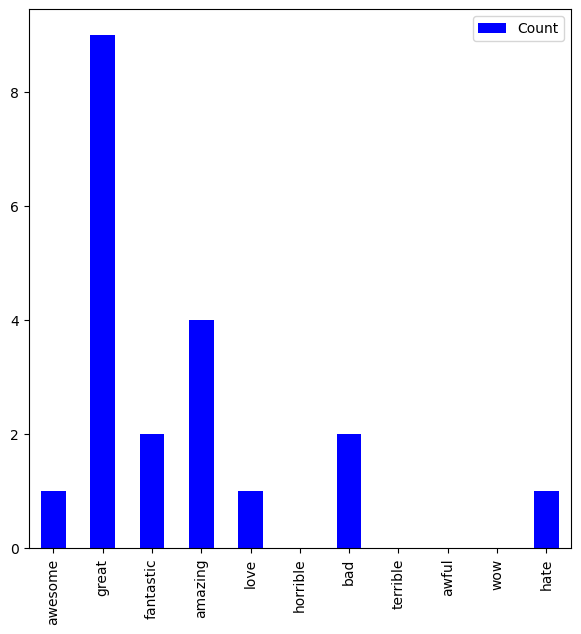

In [26]:
rest.plot(kind='bar', stacked=False, figsize=[7,7], colormap='winter')

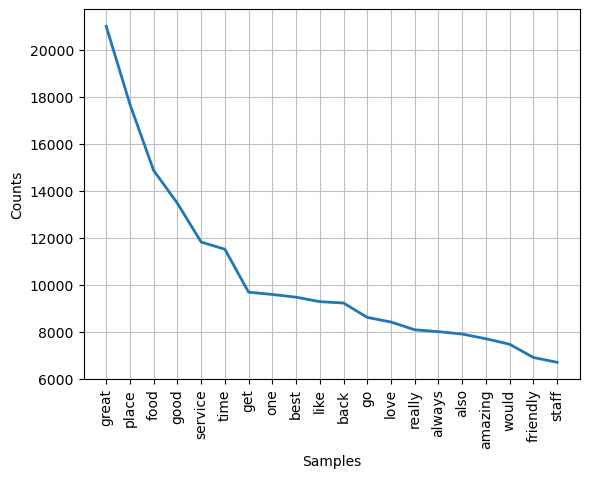

In [27]:
plot_Freq(cleaned_text[cleaned_text['stars']==5])

In [28]:
select_stars = text[(text['stars']==1) | (text['stars']==5)]

In [29]:
x = select_stars['text']
y = select_stars['stars']

In [30]:
count_vec = CountVectorizer().fit(x)
x = count_vec.transform(x)

In [31]:
print("Shape of the sparse matrix: ", x.shape)

Shape of the sparse matrix:  (50076, 60984)


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [33]:
# Create a Multinomial Naive Bayes classifier object.
mnb = MultinomialNB()

# Train the Multinomial Naive Bayes classifier using the training data.
mnb.fit(x_train, y_train)

# Make predictions on the test data.
predmnb = mnb.predict(x_test)

# Print the confusion matrix for the Multinomial Naive Bayes classifier.
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test, predmnb))

# Print the accuracy score of the Multinomial Naive Bayes classifier on the test data.
print("Score:", round(accuracy_score(y_test, predmnb) * 100, 2))

# Print the classification report for the Multinomial Naive Bayes classifier.
print("Classification Report:", classification_report(y_test, predmnb))


Confusion Matrix for Multinomial Naive Bayes:
[[2039  269]
 [ 338 7370]]
Score: 93.94
Classification Report:               precision    recall  f1-score   support

           1       0.86      0.88      0.87      2308
           5       0.96      0.96      0.96      7708

    accuracy                           0.94     10016
   macro avg       0.91      0.92      0.92     10016
weighted avg       0.94      0.94      0.94     10016



In [34]:
# Create a TfidfTransformer to convert the raw term frequency matrix 'x' into a TF-IDF representation.
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x)

# Split the TF-IDF transformed data into training and testing sets.
x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

# Create a Multinomial Naive Bayes classifier for TF-IDF transformed data.
mnb_tfidf = MultinomialNB()

# Train the Multinomial Naive Bayes classifier on the TF-IDF transformed training data.
mnb_tfidf.fit(x_tfidf_train, y_tfidf_train)

# Make predictions on the TF-IDF transformed test data.
pred_mnb_tfidf = mnb_tfidf.predict(x_tfidf_test)

# Print the confusion matrix for the Multinomial Naive Bayes classifier on TF-IDF transformed data.
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_tfidf_test, pred_mnb_tfidf))

# Print the accuracy score of the Multinomial Naive Bayes classifier on TF-IDF transformed test data.
print("Score:", round(accuracy_score(y_tfidf_test, pred_mnb_tfidf) * 100, 2))

# Print the classification report for the Multinomial Naive Bayes classifier on TF-IDF transformed test data.
print("Classification Report:", classification_report(y_tfidf_test, pred_mnb_tfidf))


Confusion Matrix for Multinomial Naive Bayes:
[[ 738 1570]
 [  19 7689]]
Score: 84.14
Classification Report:               precision    recall  f1-score   support

           1       0.97      0.32      0.48      2308
           5       0.83      1.00      0.91      7708

    accuracy                           0.84     10016
   macro avg       0.90      0.66      0.69     10016
weighted avg       0.86      0.84      0.81     10016



In [35]:
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[1465  843]
 [  55 7653]]
Score: 91.03
Classification Report:               precision    recall  f1-score   support

           1       0.96      0.63      0.77      2308
           5       0.90      0.99      0.94      7708

    accuracy                           0.91     10016
   macro avg       0.93      0.81      0.85     10016
weighted avg       0.92      0.91      0.90     10016



In [36]:
# Select a positive review from the 'text' DataFrame.
positive_review = text['text'][1]

# Print the text of the selected positive review.
print(positive_review)

# Print the actual star rating associated with the selected positive review.
print("Actual Rating:", text['stars'][1])

# Transform the selected positive review using the previously trained CountVectorizer.
pr_t = count_vec.transform([positive_review])

# Print the predicted star rating for the selected positive review using the Multinomial Naive Bayes classifier.
print("Predicted Rating:")
mnb.predict(pr_t)[0]


Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. 

We had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. 

A bit outside of downtown montreal but take the metro out and it's less than a 10 minute walk from the station.
Actual Rating: 5
Predicted Rating:


5

In [37]:
# Select a negative review from the 'text' DataFrame.
negative_review = text['text'][3]

# Print the text of the selected negative review.
print(negative_review)

# Print the actual star rating associated with the selected negative review.
print("Actual Rating:", text['stars'][3])

# Transform the selected negative review using the previously trained CountVectorizer.
nr_t = count_vec.transform([negative_review])

# Print the predicted star rating for the selected negative review using the Multinomial Naive Bayes classifier.
print("Predicted Rating:")
mnb.predict(nr_t)[0]


Love coming here. Yes the place always needs the floor swept but when you give out  peanuts in the shell how won't it always be a bit dirty. 

The food speaks for itself, so good. Burgers are made to order and the meat is put on the grill when you order your sandwich. Getting the small burger just means 1 patty, the regular is a 2 patty burger which is twice the deliciousness. 

Getting the Cajun fries adds a bit of spice to them and whatever size you order they always throw more fries (a lot more fries) into the bag.
Actual Rating: 4
Predicted Rating:


5